In [1]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt    
    

In [2]:
# Isolate data items
# Date Range A: Normal Operating Period 22nd Dec 2017 - 25th Jan 2018
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL', 'MCO']
Date_Range_A_Dates = ['20171222', '20171223', '20171224', '20171225','20180122', '20180123', '20180124', '20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]


Flight Counter: 1
Airline Flight#: DL656
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T10:55:00.000
Actual Departure: 2017-12-22T16:51:00.000
Flight Departure Delayed by (H:M:S): 5:56:00
Departure Time Delta (minutes): 356.0


Flight Counter: 2
Airline Flight#: DL1188
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T11:37:00.000
Actual Departure: 2017-12-22T13:52:00.000
Flight Departure Delayed by (H:M:S): 2:15:00
Departure Time Delta (minutes): 135.0


Flight Counter: 3
Airline Flight#: DL1586
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T13:30:00.000
Actual Departure: 2017-12-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 4
Airline Flight#: DL1963
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T13:35:00.000
Actual Departure: 2017-12-22T14:04:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 5
Airline F

Flight Counter: 104
Airline Flight#: DL1383
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:03:00.000
Actual Departure: 2017-12-22T15:59:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 105
Airline Flight#: DL1462
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:08:00.000
Actual Departure: 2017-12-22T16:07:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 106
Airline Flight#: DL476
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:20:00.000
Actual Departure: 2017-12-22T16:19:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 107
Airline Flight#: DL1800
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:20:00.000
Actual Departure: 2017-12-22T16:14:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 108
Airline Fligh

Flight Counter: 170
Airline Flight#: DL131
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:45:00.000
Actual Departure: 2017-12-22T17:41:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 171
Airline Flight#: DL1789
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:47:00.000
Actual Departure: 2017-12-22T17:44:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 172
Airline Flight#: DL1774
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:48:00.000
Actual Departure: 2017-12-22T18:02:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 173
Airline Flight#: DL2266
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:49:00.000
Actual Departure: 2017-12-22T17:52:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 174
Airline 

Flight Counter: 257
Airline Flight#: DL2827
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:31:00.000
Actual Departure: 2017-12-22T19:31:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 258
Airline Flight#: DL2242
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:32:00.000
Actual Departure: 2017-12-22T19:29:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 259
Airline Flight#: DL2287
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:33:00.000
Actual Departure: 2017-12-22T19:30:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 260
Airline Flight#: DL1356
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:34:00.000
Actual Departure: 2017-12-22T19:52:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 261
Airline Flight#: DL2580
Airpo

Departure Time Delta (minutes): -1.0


Flight Counter: 332
Airline Flight#: DL1983
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:55:00.000
Actual Departure: 2017-12-23T15:18:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 333
Airline Flight#: DL2398
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:58:00.000
Actual Departure: 2017-12-23T15:16:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 334
Airline Flight#: DL902
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:58:00.000
Actual Departure: 2017-12-23T15:38:00.000
Flight Departure Delayed by (H:M:S): 0:40:00
Departure Time Delta (minutes): 40.0


Flight Counter: 335
Airline Flight#: DL1524
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:59:00.000
Actual Departure: 2017-12-23T14:56:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (mi

Flight Counter: 409
Airline Flight#: DL2309
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:40:00.000
Actual Departure: 2017-12-23T17:05:00.000
Flight Departure Delayed by (H:M:S): 0:25:00
Departure Time Delta (minutes): 25.0


Flight Counter: 410
Airline Flight#: DL2863
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:40:00.000
Actual Departure: 2017-12-23T16:41:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 411
Airline Flight#: DL1138
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:45:00.000
Actual Departure: 2017-12-23T16:57:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 412
Airline Flight#: DL81
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:45:00.000
Actual Departure: 2017-12-23T18:03:00.000
Flight Departure Delayed by (H:M:S): 1:18:00
Departure Time Delta (minutes): 78.0


Flight Counter: 413
Air

Flight Counter: 493
Airline Flight#: DL313
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:56:00.000
Actual Departure: 2017-12-23T19:36:00.000
Flight Departure Delayed by (H:M:S): 0:40:00
Departure Time Delta (minutes): 40.0


Flight Counter: 494
Airline Flight#: DL632
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:00:00.000
Actual Departure: 2017-12-23T19:01:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 495
Airline Flight#: DL2327
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:00:00.000
Actual Departure: 2017-12-23T21:54:00.000
Flight Departure Delayed by (H:M:S): 2:54:00
Departure Time Delta (minutes): 174.0


Flight Counter: 496
Airline Flight#: DL2210
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:01:00.000
Actual Departure: 2017-12-23T19:20:00.000
Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 497
Ai



Flight Counter: 554
Airline Flight#: DL2224
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T13:40:00.000
Actual Departure: 2017-12-24T13:39:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 555
Airline Flight#: DL1701
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T13:41:00.000
Actual Departure: 2017-12-24T13:38:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 556
Airline Flight#: DL1270
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T13:43:00.000
Actual Departure: 2017-12-24T14:01:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 557
Airline Flight#: DL2451
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T13:46:00.000
Actual Departure: 2017-12-24T13:43:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 558
Airline

Flight Counter: 634
Airline Flight#: DL1964
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:30:00.000
Actual Departure: 2017-12-24T16:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 635
Airline Flight#: DL2381
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:31:00.000
Actual Departure: 2017-12-24T16:29:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 636
Airline Flight#: DL2483
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:32:00.000
Actual Departure: 2017-12-24T16:30:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 637
Airline Flight#: DL1364
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:36:00.000
Actual Departure: 2017-12-24T16:33:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 638
Airline Flig

Flight Counter: 719
Airline Flight#: DL1417
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:15:00.000
Actual Departure: 2017-12-24T19:09:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 720
Airline Flight#: DL1223
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:16:00.000
Actual Departure: 2017-12-24T19:10:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 721
Airline Flight#: DL2117
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:17:00.000
Actual Departure: 2017-12-24T19:25:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 722
Airline Flight#: DL1422
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:20:00.000
Actual Departure: 2017-12-24T19:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 723
Airline Fl

Flight Counter: 785
Airline Flight#: DL2034
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:15:00.000
Actual Departure: 2017-12-25T15:14:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 786
Airline Flight#: DL2445
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:15:00.000
Actual Departure: 2017-12-25T15:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 787
Airline Flight#: DL942
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:16:00.000
Actual Departure: 2017-12-25T15:16:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 788
Airline Flight#: DL1114
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:18:00.000
Actual Departure: 2017-12-25T15:15:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 789
Airline Flight#: DL765
Airport: A

Flight Counter: 874
Airline Flight#: DL377
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T18:35:00.000
Actual Departure: 2017-12-25T19:07:00.000
Flight Departure Delayed by (H:M:S): 0:32:00
Departure Time Delta (minutes): 32.0


Flight Counter: 875
Airline Flight#: DL355
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T18:37:00.000
Actual Departure: 2017-12-25T18:35:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 876
Airline Flight#: DL1385
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T18:45:00.000
Actual Departure: 2017-12-25T19:18:00.000
Flight Departure Delayed by (H:M:S): 0:33:00
Departure Time Delta (minutes): 33.0


Flight Counter: 877
Airline Flight#: DL15
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T18:45:00.000
Actual Departure: 2017-12-25T18:44:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 878
Airline Fl

Scheduled Departure: 2018-01-22T13:58:00.000
Actual Departure: 2018-01-22T13:56:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 943
Airline Flight#: DL888
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:58:00.000
No Gate Depature Delay Data
Delay (Minutes): 0
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 944
Airline Flight#: DL1398
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:59:00.000
Actual Departure: 2018-01-22T13:54:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 945
Airline Flight#: DL1271
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:59:00.000
Actual Departure: 2018-01-22T13:53:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 946
Airline Flight#: DL2393
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:00:00.000
Act

Flight Counter: 1025
Airline Flight#: DL2398
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:34:00.000
Actual Departure: 2018-01-22T15:48:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 1026
Airline Flight#: DL1689
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:35:00.000
Actual Departure: 2018-01-22T15:32:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1027
Airline Flight#: DL82
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:38:00.000
Actual Departure: 2018-01-22T15:35:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1028
Airline Flight#: DL2448
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:38:00.000
Actual Departure: 2018-01-22T15:36:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1029
Airlin

Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1109
Airline Flight#: DL2784
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:30:00.000
Actual Departure: 2018-01-22T17:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1110
Airline Flight#: DL131
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:38:00.000
Actual Departure: 2018-01-22T17:36:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1111
Airline Flight#: DL91
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:38:00.000
Actual Departure: 2018-01-22T17:36:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1112
Airline Flight#: DL2863
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:38:00.000
Actual Departure: 2018-01-22T17:38:00.000
Flight Departed On Time!
Departure Time Delta (minu

Flight Counter: 1199
Airline Flight#: DL1926
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:30:00.000
Actual Departure: 2018-01-22T19:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1200
Airline Flight#: DL2186
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:30:00.000
Actual Departure: 2018-01-22T20:28:00.000
Flight Departure Delayed by (H:M:S): 0:58:00
Departure Time Delta (minutes): 58.0


Flight Counter: 1201
Airline Flight#: DL2348
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:31:00.000
Actual Departure: 2018-01-22T19:33:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1202
Airline Flight#: DL1356
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:33:00.000
Actual Departure: 2018-01-22T19:30:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1203
Airline Flight#: DL197

Flight Counter: 1275
Airline Flight#: DL1121
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:32:00.000
Actual Departure: 2018-01-23T14:26:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1276
Airline Flight#: DL2801
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:38:00.000
Actual Departure: 2018-01-23T14:26:00.000
Flight Departed Early by (H:M:S): 0:12:00
Departure Time Delta (minutes): -12.0


Flight Counter: 1277
Airline Flight#: DL725
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:40:00.000
Actual Departure: 2018-01-23T14:38:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1278
Airline Flight#: DL2245
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:44:00.000
Actual Departure: 2018-01-23T14:42:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1279
Airline

Flight Counter: 1345
Airline Flight#: DL2737
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:05:00.000
Actual Departure: 2018-01-23T16:04:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1346
Airline Flight#: DL1378
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:08:00.000
Actual Departure: 2018-01-23T16:03:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1347
Airline Flight#: DL1176
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:13:00.000
Actual Departure: 2018-01-23T16:11:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1348
Airline Flight#: DL2319
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:15:00.000
Actual Departure: 2018-01-23T16:08:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1349
Airline

Flight Counter: 1432
Airline Flight#: DL325
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:57:00.000
Actual Departure: 2018-01-23T18:03:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1433
Airline Flight#: DL313
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:58:00.000
Actual Departure: 2018-01-23T17:52:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1434
Airline Flight#: DL1218
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:59:00.000
Actual Departure: 2018-01-23T18:02:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1435
Airline Flight#: DL1226
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:59:00.000
Actual Departure: 2018-01-23T17:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1436
Airli

Flight Counter: 1510
Airline Flight#: DL2426
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:55:00.000
Actual Departure: 2018-01-23T19:48:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1511
Airline Flight#: DL26
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:55:00.000
Actual Departure: 2018-01-23T19:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1512
Airline Flight#: DL2749
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:55:00.000
Actual Departure: 2018-01-23T19:51:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1513
Airline Flight#: DL2289
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:56:00.000
Actual Departure: 2018-01-23T19:56:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1514
Airline Flight#: DL1753
Airpo

Flight Counter: 1595
Airline Flight#: DL1998
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:10:00.000
Actual Departure: 2018-01-24T15:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1596
Airline Flight#: DL2006
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:10:00.000
Actual Departure: 2018-01-24T15:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1597
Airline Flight#: DL2053
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:10:00.000
Actual Departure: 2018-01-24T15:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1598
Airline Flight#: DL2059
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:11:00.000
Actual Departure: 2018-01-24T15:07:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1599
Airline

Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1664
Airline Flight#: DL2445
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:42:00.000
Actual Departure: 2018-01-24T16:36:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1665
Airline Flight#: DL1705
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:44:00.000
Actual Departure: 2018-01-24T16:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1666
Airline Flight#: DL1623
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:39:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1667
Airline Flight#: DL1800
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:43:00.000
Flight Departed Early by (

Flight Counter: 1747
Airline Flight#: DL2150
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:55:00.000
Actual Departure: 2018-01-24T19:00:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1748
Airline Flight#: DL699
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:55:00.000
Actual Departure: 2018-01-24T18:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1749
Airline Flight#: DL951
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:00:00.000
Actual Departure: 2018-01-24T18:59:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1750
Airline Flight#: DL2327
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:00:00.000
Actual Departure: 2018-01-24T19:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1751
Airline Flight#: DL2502
Air

Flight Counter: 1824
Airline Flight#: DL420
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:50:00.000
Actual Departure: 2018-01-25T13:50:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1825
Airline Flight#: DL2224
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:51:00.000
Actual Departure: 2018-01-25T13:59:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 1826
Airline Flight#: DL1265
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:52:00.000
Actual Departure: 2018-01-25T13:47:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1827
Airline Flight#: DL1690
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:52:00.000
Actual Departure: 2018-01-25T13:48:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1828
Airline Flight#: DL1513
Ai

Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:10:00.000
Actual Departure: 2018-01-25T15:04:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1896
Airline Flight#: DL2006
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:10:00.000
Actual Departure: 2018-01-25T15:03:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1897
Airline Flight#: DL1998
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:10:00.000
Actual Departure: 2018-01-25T15:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1898
Airline Flight#: DL2059
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:11:00.000
Actual Departure: 2018-01-25T15:15:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1899
Airline Flight#: DL1871
Airport: ATL
Date: 2018-01-25
Scheduled

Flight Counter: 1974
Airline Flight#: DL1251
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:54:00.000
Actual Departure: 2018-01-25T16:54:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1975
Airline Flight#: DL383
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:55:00.000
Actual Departure: 2018-01-25T16:51:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1976
Airline Flight#: DL29
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:55:00.000
Actual Departure: 2018-01-25T16:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1977
Airline Flight#: DL887
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:56:00.000
Actual Departure: 2018-01-25T16:55:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1978
Airline Flight#: DL359
Airport:

Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:46:00.000
Actual Departure: 2018-01-25T18:39:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 2053
Airline Flight#: DL355
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:52:00.000
Actual Departure: 2018-01-25T18:49:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2054
Airline Flight#: DL2150
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:55:00.000
Actual Departure: 2018-01-25T18:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2055
Airline Flight#: DL2502
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:00:00.000
Actual Departure: 2018-01-25T19:03:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 2056
Airline Flight#: DL2327
Airport: ATL
Date: 2018-01-

Flight Counter: 2133
Airline Flight#: DL1058
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T14:20:00.000
Actual Departure: 2017-12-22T14:23:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 2134
Airline Flight#: DL545
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T14:50:00.000
Actual Departure: 2017-12-22T14:50:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2135
Airline Flight#: DL72
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:20:00.000
Actual Departure: 2017-12-22T15:18:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 2136
Airline Flight#: DL1374
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:30:00.000
Actual Departure: 2017-12-22T15:35:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 2137
Airline Flight#: DL409
Air

Departure Time Delta (minutes): 17.0


Flight Counter: 2219
Airline Flight#: DL1424
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:06:00.000
Actual Departure: 2018-01-22T14:03:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2220
Airline Flight#: DL1491
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:20:00.000
Actual Departure: 2018-01-22T14:16:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2221
Airline Flight#: DL1787
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:22:00.000
No Gate Depature Delay Data
Delay (Minutes): 0
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2222
Airline Flight#: DL72
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:20:00.000
Actual Departure: 2018-01-22T15:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight

Flight Counter: 2300
Airline Flight#: DL869
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:33:00.000
Actual Departure: 2018-01-25T18:36:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 2301
Airline Flight#: DL2880
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:40:00.000
Actual Departure: 2018-01-25T18:33:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 2302
Airline Flight#: DL1061
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:51:00.000
Actual Departure: 2018-01-25T19:04:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 2303
Airline Flight#: DL2703
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:55:00.000
Actual Departure: 2018-01-25T18:49:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 2304
Air

In [3]:
# Summarize Date Range A
print(f"\nDeparture Summary for Date Range A\n")

Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()







Departure Summary for Date Range A

Total Departures Early: 1291
Total Departures On Time: 205
Total Departures Delayed: 811
Total Departures: 2307



,Early,On Time,Delayed
0,1291,205,811


In [4]:
# Describe Date Range A
Date_Range_A_df.describe()



,Delay
count,2307.000000
mean,7.107932
std,32.141492
min,-28.000000
25%,-3.000000
50%,-1.000000
75%,6.000000
max,759.000000


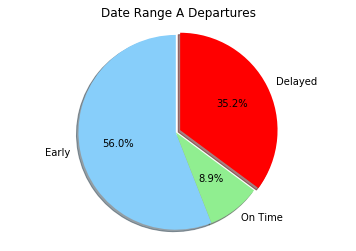

In [5]:
# Plot Date Range A Departures

Date_Range_A_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_A_Labels = ["Early", "On Time", "Delayed"]
colors = ["lightskyblue", "lightgreen", "red"]
explode = (0, 0, 0.05)

plt.title("Date Range A Departures")
plt.pie(Date_Range_A_Summary, autopct="%1.1f%%", explode=explode, labels=Date_Range_A_Labels, colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [227]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B